In [1]:
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

import umap

import matplotlib.pyplot as plt

/Users/isabel/anaconda3/envs/bananaBread/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [3]:
bread_ingredients_list = list(pd.read_csv('./data/breads.csv')['text'])
cake_ingredients_list = list(pd.read_csv('./data/cakes.csv')['text'])
banana_bread_ingredients_list = list(pd.read_csv('./data/bananas.csv')['text'])

In [10]:
bread_embeddings = model.encode(bread_ingredients_list)
cake_embeddings = model.encode(cake_ingredients_list)
banana_bread_embeddings = model.encode(banana_bread_ingredients_list)


bread_labels = ['bread'] * len(bread_ingredients_list)
cake_labels = ['cake'] * len(cake_ingredients_list)
banana_labels = ['banana bread'] * len(banana_bread_ingredients_list)


In [11]:
all_embeddings = []
all_labels = []
all_embeddings.extend(bread_embeddings)
all_embeddings.extend(cake_embeddings)
all_embeddings.extend(banana_bread_embeddings)

all_labels.extend(bread_labels)
all_labels.extend(cake_labels)
all_labels.extend(banana_labels)

In [12]:
bread_banana = cosine_similarity(bread_embeddings, banana_bread_embeddings)
cake_banana = cosine_similarity(cake_embeddings, banana_bread_embeddings)

In [13]:
print(f"Distance from bread to banana bread embeddings: {bread_banana.mean()}")
print(f"Distance from cake to banana bread embeddings: {cake_banana.mean()}")

Distance from bread to banana bread embeddings: 0.6254956722259521
Distance from cake to banana bread embeddings: 0.7330538034439087


In [14]:
umap_model = umap.UMAP(n_components=2, n_neighbors=10, random_state=1618)
results = umap_model.fit_transform(all_embeddings)

/Users/isabel/anaconda3/envs/bananaBread/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


/var/folders/12/p5c0vdcj3yx9xb69fcd0n3j80000gn/T/ipykernel_11648/3580686044.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))  # color map


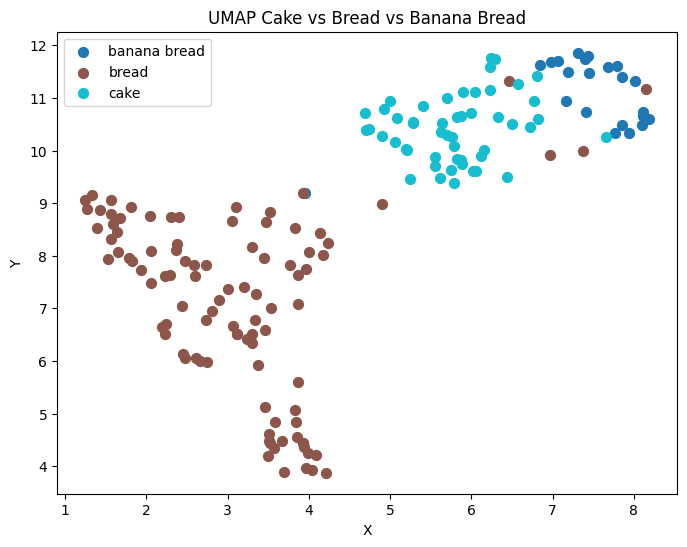

In [15]:
def plot_points(points, labels, title="UMAP Cake vs Bread vs Banana Bread", xlabel="X", ylabel="Y"):
    points = np.array(points)
    labels = np.array(labels)

    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))  # color map

    plt.figure(figsize=(8, 6))
    for i, label in enumerate(unique_labels):
        mask = labels == label
        plt.scatter(points[mask, 0], points[mask, 1], 
                    color=colors(i), label=str(label), s=50)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    # plt.grid(True)
    plt.savefig(f"./figures/umapIngredients.png", bbox_inches='tight', dpi=300)
    plt.show()

plot_points(results, all_labels)